## 1. Setup and Imports

In [1]:
import sys
import os

# Add the src directory to the path so we can import malthusjax
sys.path.append('/Users/leonardodicaterina/Documents/GitHub/MalthusJAX/src')

import jax
import jax.numpy as jnp
import jax.random as jar
import matplotlib.pyplot as plt

from malthusjax.core.genome import BinaryGenome
from malthusjax.core.fitness.binary_ones import BinarySumFitnessEvaluator
from malthusjax.core.population.population import AbstractPopulation
from malthusjax.operators.mutation.binary import BitFlipMutation, ScrambleMutation
from malthusjax.operators.crossover.binary import UniformCrossover, CycleCrossover, SinglePointCrossover
from malthusjax.operators.selection.tournament import TournamentSelection
from malthusjax.operators.selection.roulette import RouletteSelection

print("JAX version:", jax.__version__)
print("Available devices:", jax.devices())

JAX version: 0.7.0
Available devices: [CpuDevice(id=0)]


## 2. BitFlipMutation: Introducing Genetic Variation
The BitFlipMutation operator randomly flips bits (0 to 1, or 1 to 0) in a binary genome with a specified probability. This introduces new genetic material into the population, preventing premature convergence.

#### Initialization
You can initialize BitFlipMutation with a default mutation rate (0.01) or a custom rate

In [2]:
# Default initialization
mutation_default = BitFlipMutation()
print(f"Default Mutation Rate: {mutation_default.mutation_rate}") 

# Custom initialization
custom_mutation_rate = 0.05
mutation_custom = BitFlipMutation(mutation_rate=custom_mutation_rate)
print(f"Custom Mutation Rate: {mutation_custom.mutation_rate}")

pop_size = 5
genome_init_params = {'array_size': 10, 'p': 0.5}
population = AbstractPopulation(
    genome_cls=BinaryGenome,
    pop_size=pop_size,
    random_init=True,
    random_key=jar.PRNGKey(10),
    genome_init_params=genome_init_params,
)
key = jar.PRNGKey(0)
# make a key array of the same size as the population
key = jar.split(key, pop_size)


Default Mutation Rate: 0.01
Custom Mutation Rate: 0.05


### Demonstration of Mutation
Let's see BitFlipMutation in action on a sample genome and then on a population.

In [3]:
# Apply mutation with a high rate (e.g., 0.5) to see clear changes
mutation_demo = BitFlipMutation(mutation_rate=0.5)

print("\nPopulation before mutation:")
for i, sol in enumerate(population):
    print(f"  Solution {i}: {sol}")



Population before mutation:
  Solution 0: [False False False False  True False False False  True  True]
  Solution 1: [ True  True False False False  True  True False  True False]
  Solution 2: [ True  True False  True False  True  True False  True  True]
  Solution 3: [False  True False  True  True False  True False False  True]
  Solution 4: [ True  True  True False  True False  True  True  True  True]


In [4]:
population


Population(genome_cls=BinaryGenome, pop_size=5, current_size=5)

In [5]:
# Apply mutation
mutation_fn = mutation_demo.build(population)
mutated_genomes = mutation_fn(population._genomes, key)

print("\nPopulation after mutation:")
for i, genome in enumerate(mutated_genomes):
    print(f"  Mutated Genome {i}: {genome}")   



Population after mutation:
  Mutated Genome 0: [False  True  True  True False False False  True  True False]
  Mutated Genome 1: [False False False  True  True False False False False False]
  Mutated Genome 2: [ True  True  True False False  True  True  True  True False]
  Mutated Genome 3: [ True  True False False False False  True  True False  True]
  Mutated Genome 4: [False  True False  True False  True  True  True  True False]


In [6]:
# Apply mutation with a high rate (e.g., 0.5) to see clear changes
mutation_demo = ScrambleMutation(mutation_rate=0.5)


print("\nPopulation before mutation:")
for i, sol in enumerate(population):
    print(f"  Solution {i}: {sol}")

# Apply mutation
mutation_fn = mutation_demo.build(population)
mutated_genomes = mutation_fn(population._genomes, key)

print("\nPopulation after mutation:")
for i, genome in enumerate(mutated_genomes):
    print(f"  Mutated Genome {i}: {genome}")  


Population before mutation:
  Solution 0: [False False False False  True False False False  True  True]
  Solution 1: [ True  True False False False  True  True False  True False]
  Solution 2: [ True  True False  True False  True  True False  True  True]
  Solution 3: [False  True False  True  True False  True False False  True]
  Solution 4: [ True  True  True False  True False  True  True  True  True]

Population after mutation:
  Mutated Genome 0: [False False False False  True False False False  True  True]
  Mutated Genome 1: [ True False False  True  True  True False  True False False]
  Mutated Genome 2: [ True  True False  True False  True  True False  True  True]
  Mutated Genome 3: [False False  True  True False  True  True False  True False]
  Mutated Genome 4: [ True False  True  True  True  True  True  True  True False]


## crossovers

In [7]:
# Example usage of UniformCrossover
crossover_operator = UniformCrossover(crossover_rate=0.7)
print(f"Uniform Crossover Rate: {crossover_operator.crossover_rate}")
# Example usage of CycleCrossover
cycle_crossover_operator = CycleCrossover(crossover_rate=0.7)
print(f"Cycle Crossover Rate: {cycle_crossover_operator.crossover_rate}")   


Uniform Crossover Rate: 0.7
Cycle Crossover Rate: 0.7


In [8]:
crossover_demo = UniformCrossover(crossover_rate=0.5)

print("\nPopulation before crossover:")
for i, sol in enumerate(population):
    print(f"  Solution {i}: {sol}")
# Apply crossover
crossover_fn = crossover_demo.get_batched_function()
crossovered_genomes = crossover_fn(population._genomes, key)

print("\nPopulation after crossover:")
for i, genome in enumerate(crossovered_genomes):
    print(f"  Crossovered Genome {i}: {genome}")
  


Population before crossover:
  Solution 0: [False False False False  True False False False  True  True]
  Solution 1: [ True  True False False False  True  True False  True False]
  Solution 2: [ True  True False  True False  True  True False  True  True]
  Solution 3: [False  True False  True  True False  True False False  True]
  Solution 4: [ True  True  True False  True False  True  True  True  True]

Population after crossover:
  Crossovered Genome 0: [False False False False  True False False False  True  True]
  Crossovered Genome 1: [ True  True False False False  True  True False  True  True]
  Crossovered Genome 2: [ True  True False  True  True False  True False  True  True]
  Crossovered Genome 3: [False  True False  True  True  True  True False  True False]
  Crossovered Genome 4: [ True  True  True False  True False  True False False  True]


In [9]:
crossover_demo = CycleCrossover(crossover_rate=0.5)

print("\nPopulation before crossover:")
for i, sol in enumerate(population):
    print(f"  Solution {i}: {sol}")
# Apply crossover
crossover_fn = crossover_demo.get_batched_function()
crossovered_genomes = crossover_fn(population._genomes, key)

print("\nPopulation after crossover:")
for i, genome in enumerate(crossovered_genomes):
    print(f"  Crossovered Genome {i}: {genome}")
  
evaluator = BinarySumFitnessEvaluator()
print("\nEvaluating fitness of crossovered genomes:")
fitness_values = evaluator.evaluate_batch(crossovered_genomes)
for i, fitness in enumerate(fitness_values):
    print(f"  Fitness of Crossovered Genome {i}: {fitness}")    
# Create a new population from the crossovered genomes
new_population = population.from_stack(
    crossovered_genomes
)


Population before crossover:
  Solution 0: [False False False False  True False False False  True  True]
  Solution 1: [ True  True False False False  True  True False  True False]
  Solution 2: [ True  True False  True False  True  True False  True  True]
  Solution 3: [False  True False  True  True False  True False False  True]
  Solution 4: [ True  True  True False  True False  True  True  True  True]

Population after crossover:
  Crossovered Genome 0: [False False False False  True False False False  True  True]
  Crossovered Genome 1: [ True  True False False False  True  True False  True False]
  Crossovered Genome 2: [ True  True False  True False  True  True False  True  True]
  Crossovered Genome 3: [ True  True False  True  True False  True False False  True]
  Crossovered Genome 4: [False  True  True  True  True False  True  True  True  True]

Evaluating fitness of crossovered genomes:
  Fitness of Crossovered Genome 0: 3.0
  Fitness of Crossovered Genome 1: 5.0
  Fitness

## stack evaluation

In [11]:
fitness_evaluator = BinarySumFitnessEvaluator()
population = AbstractPopulation(
    genome_cls=BinaryGenome,
    pop_size=10,
    random_init=True,
    random_key=jar.PRNGKey(10),
    genome_init_params={'array_size': 10, 'p': 0.5},
    fitness_transform=None,
)

fitness_values = fitness_evaluator.evaluate_batch(population, return_tensors=True)
selection_operator = TournamentSelection(number_of_tournaments=10, tournament_size=3)
selection_operator2 = RouletteSelection(number_choices=10)

print(f"type of fitness values: {type(fitness_values)}")
print(f"type of population: {type(population)}")
selected_population = selection_operator(population, random_key=jar.PRNGKey(42), fitness_values=fitness_values)
selected_population2 = selection_operator2(population, random_key=jar.PRNGKey(42), fitness_values=fitness_values)
print("Selected indices (Tournament):", selected_population)
print("Selected indices (Roulette):", selected_population2)

type of fitness values: <class 'jaxlib._jax.ArrayImpl'>
type of population: <class 'malthusjax.core.population.base.AbstractPopulation'>
Selected indices (Tournament): Population(genome_cls=BinaryGenome, pop_size=10, current_size=10)
Selected indices (Roulette): Population(genome_cls=BinaryGenome, pop_size=10, current_size=10)


In [ ]:
random_key = jar.PRNGKey(0)
n_iterations = 1000
pop_size = 100
with_elitism = True

demo_population = AbstractPopulation(
    genome_cls=BinaryGenome,
    pop_size=pop_size,
    random_init=True,
    random_key=random_key,
    genome_init_params={'array_size': 1000, 'p': 0.1},
    fitness_transform=None,
)
demo_population_stack = demo_population.to_stack()
crossover_demo = SinglePointCrossover(crossover_rate=0.7)
mutation_demo = BitFlipMutation(mutation_rate=0.3)
n_choices = pop_size -1 if with_elitism else pop_size
#selection_demo = TournamentSelection(number_of_tournaments=n_choices, tournament_size=40)
selection_demo = RouletteSelection(number_choices=n_choices)
demo_evaluator = BinarySumFitnessEvaluator()
demo_selection_layer_fn = selection_demo.build(demo_population)
mutation_layer_fn = mutation_demo.build(demo_population)
crossover_layer_fn = crossover_demo.get_batched_function()


fitness_values_across_iterations = jnp.zeros(n_iterations,dtype=jnp.float32)

for i in range(n_iterations):
    #print(f"\nIteration {i+1}/{n_iterations}")
    # Create a new key for this iteration
    iteration_key = jar.fold_in(random_key, i)
    
    # Evaluate fitness
    fitness_values = demo_evaluator.evaluate_batch(demo_population_stack, return_tensors=True)
    #print(f"Max Fitness: {jnp.max(fitness_values)}")
    if with_elitism:
        # Get the best solution in the population
        arg_best = jnp.argmax(fitness_values)
        best_solution = jnp.expand_dims(demo_population_stack[arg_best], axis=0)
        #print(f"Best Solution: {best_solution} with fitness {fitness_values[arg_best]}")
    # Select parents
    selection_key = jar.fold_in(iteration_key, 0)
    selected_indices = demo_selection_layer_fn(fitness_values, selection_key)
    selected_population = demo_population.from_array_of_indexes(selected_indices)

    # Crossover
    #print(f"Selected Population Size: {len(selected_population)}")
    crossover_key = jar.fold_in(iteration_key, 1)
    crossover_keys = jar.split(crossover_key, n_choices)
    crossovered_genomes = crossover_layer_fn(selected_population.to_stack(), crossover_keys)
    #print(f"Crossovered Population Size: {crossovered_genomes.shape[0]}")

    # Mutation
    mutation_key = jar.fold_in(iteration_key, 2)
    mutation_keys = jar.split(mutation_key, n_choices)
    mutated_genomes = mutation_layer_fn(crossovered_genomes, mutation_keys)

    # Create new population
    demo_population_stack = mutated_genomes
    if with_elitism:
        # append the best solution to the end of the population
        #print(f"Appending best solution to the population: {best_solution}")
        #print(f"shapes of demo_population_stack: {demo_population_stack.shape}, best_solution: {best_solution.shape}")
        demo_population_stack = jnp.concatenate([
            demo_population_stack,
            best_solution
        ], axis=0)
    fitness_values_across_iterations = fitness_values_across_iterations.at[i].set(jnp.max(fitness_values))
    #print(f"New Population Size: {demo_population_stack.shape[0]}")
        

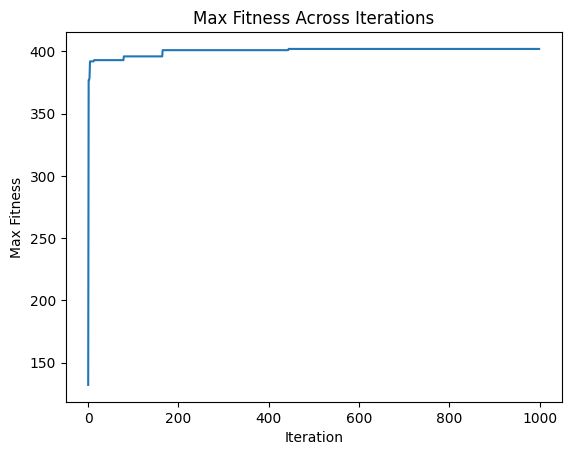

In [ ]:
# plot the fitness values across iterations
plt.plot(fitness_values_across_iterations)
plt.xlabel("Iteration")
plt.ylabel("Max Fitness")
plt.title("Max Fitness Across Iterations")
plt.show()  

In [ ]:
# let's make it with jax lax
import jax.lax as lax

pop_size = 1000
random_key = jar.PRNGKey(0)

initial_population = AbstractPopulation(
    genome_cls=BinaryGenome,
    pop_size=pop_size,
    random_init=True,
    random_key=random_key,
    genome_init_params={'array_size': 50, 'p': 0.7},
    fitness_transform=None,
)
fitness_evaluator = BinarySumFitnessEvaluator()
mutation_operator = BitFlipMutation(mutation_rate=0.3)
crossover_operator = UniformCrossover(crossover_rate=0.7)
selection_operator = RouletteSelection(number_choices=pop_size-1)


initial_population_stack = initial_population.to_stack()
fitness_evaluator_fn = fitness_evaluator.get_batch_fitness_function()
mutation_fn = mutation_operator.get_batched_function()
crossover_fn = crossover_operator.get_batched_function()
selection_fn = selection_operator.get_compiled_function()

# other useful jit functions

population_from_indexes_fn = initial_population.get_from_array_of_indexes_jit()

# assert they are callable functions
assert callable(fitness_evaluator_fn)
assert callable(mutation_fn)
assert callable(crossover_fn)
assert callable(selection_fn)   



In [ ]:
fitness_values = fitness_evaluator_fn(initial_population_stack)
print(f"Fitness values shape: {fitness_values}")
arg_best = jnp.argmax(fitness_values)
best_solution = jnp.expand_dims(initial_population_stack[arg_best], axis=0)
print(f"Best Solution: {best_solution} with fitness {fitness_values[arg_best]}")

selection_key = jar.PRNGKey(42)
selected_indices = selection_fn(fitness_values, selection_key)
print(f"shape of selected indices: {selected_indices.shape}")
new_population_stack = population_from_indexes_fn(initial_population_stack, selected_indices)
print(f"shape of new population stack: {new_population_stack.shape}")

crossed_genome_data = crossover_fn(
    new_population_stack,
    jar.split(jar.PRNGKey(0), pop_size-1)
)

print(f"shape of crossed genome data: {crossed_genome_data.shape}")
mutated_genome_data = mutation_fn(
    crossed_genome_data,
    jar.split(jar.PRNGKey(1), pop_size-1)
)
print(f"shape of mutated genome data: {mutated_genome_data.shape}")
# now we can attach the best solution if elitism is enabled
new_population_stack = jnp.concatenate([
        mutated_genome_data,
        best_solution
    ], axis=0)
print(f"shape of new population stack after elitism: {new_population_stack.shape}")

Fitness values shape: [31 40 32 32 35 24 35 32 38 33 30 36 36 28 36 38 27 34 32 32 32 41 38 32
 28 36 36 39 34 34 36 39 40 37 39 43 34 37 34 30 39 38 33 31 34 33 39 32
 39 36 36 34 31 37 30 40 34 35 37 36 36 36 35 37 35 33 32 33 30 21 35 29
 33 32 31 33 33 34 31 30 39 34 32 35 39 34 39 32 36 32 36 31 30 37 35 35
 36 38 31 34 36 40 34 36 38 38 34 39 36 34 38 31 36 33 35 36 38 41 32 41
 34 36 41 33 37 35 37 35 37 32 34 30 36 41 34 33 38 32 36 37 33 37 37 33
 29 32 38 39 33 40 29 36 38 29 40 38 36 34 36 34 37 34 37 40 37 35 37 36
 37 38 34 36 34 30 35 34 32 39 31 35 39 34 37 36 38 31 39 37 38 29 36 38
 35 32 33 40 33 36 29 28 36 32 40 39 39 29 33 34 30 38 35 39 32 36 39 33
 34 39 33 36 34 35 33 27 35 44 34 30 38 35 35 34 36 33 37 35 36 33 40 34
 32 29 33 36 34 35 39 36 39 31 38 32 32 38 35 41 36 36 37 33 36 37 34 36
 34 36 26 32 35 32 34 32 37 38 35 42 35 34 37 34 34 41 30 40 36 31 34 33
 30 33 32 27 37 39 37 36 31 33 37 35 37 39 37 40 30 35 35 29 36 38 38 32
 35 32 32 35 37 37 37 36 36 3

In [ ]:
def ga_step_with_elitism(carry, i):
    population_stack, random_key = carry
    iteration_key = jar.fold_in(random_key, i)
    #print(f"stack order: {population_stack.shape}")
    # Evaluate fitness
    fitness_values = fitness_evaluator_fn(population_stack)
    #print(f"Max Fitness: {jnp.max(fitness_values)}")

    # Get the best solution in the population
    arg_best = jnp.argmax(fitness_values)
    best_solution = jnp.expand_dims(population_stack[arg_best], axis=0)
    max_fitness = fitness_values[arg_best]
    #print(f"Best Solution: {best_solution} with fitness {fitness_values[arg_best]}")

    # crossover and mutation keys
    crossover_key = jar.fold_in(iteration_key, 1)
    crossover_keys = jar.split(crossover_key, population_stack.shape[0] - 1)
    mutation_key = jar.fold_in(iteration_key, 2)
    mutation_keys = jar.split(mutation_key, population_stack.shape[0] - 1)
    selection_key = jar.fold_in(iteration_key, 0)
    
    # Select parents
    parents = selection_fn(fitness_values, selection_key)
    selected_population = population_from_indexes_fn(population_stack, parents)
    #print(f"Selected Population Size: {len(selected_population)}")

    # Crossover
    #print(f"Selected Population Stack Shape: {selected_population.shape}")
    #print(f"Crossover Keys Shape: {crossover_keys.shape}")

    crossovered_genomes = crossover_fn(selected_population, crossover_keys)
    #print(f"Crossovered Population Size: {crossovered_genomes.shape[0]}")

    # Mutation
    mutated_genomes = mutation_fn(crossovered_genomes, mutation_keys)
    
    new_population_stack = jnp.concatenate([
        mutated_genomes,
        best_solution
    ], axis=0)

    # Update random key for next iteration
    new_random_key = jar.fold_in(random_key, i + 1)
    
    # Return the expected tuple structure
    return (new_population_stack, new_random_key), max_fitness
# run one single step for testing
(carry_population_stack, carry_random_key), max_fitness = ga_step_with_elitism((initial_population_stack, random_key), 0)
#print(f"Carry Population Stack Shape: {carry_population_stack.shape}, Max Fitness: {max_fitness}")

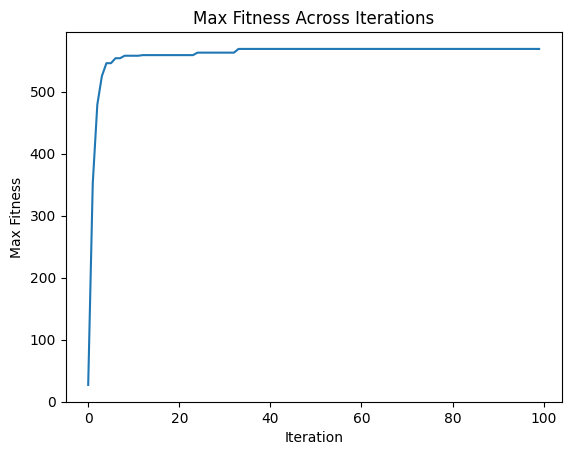

In [ ]:
# run the ga for n iterations
n_iterations = 100
initial_population = AbstractPopulation(
    genome_cls=BinaryGenome,
    pop_size=pop_size,
    random_init=True,
    random_key=random_key,
    genome_init_params={'array_size': 1000, 'p': 0.01},
    fitness_transform=None,
)
initial_population_stack = initial_population.to_stack()
initial_carry = (initial_population_stack, random_key)
(carry_population_stack, carry_random_key), fitness_values_across_iterations = lax.scan(
    ga_step_with_elitism,
    initial_carry,
    jnp.arange(n_iterations)
)
# plot the fitness values across iterations
plt.plot(fitness_values_across_iterations)
plt.xlabel("Iteration")
plt.ylabel("Max Fitness")
plt.title("Max Fitness Across Iterations")
plt.show()